Exercise :

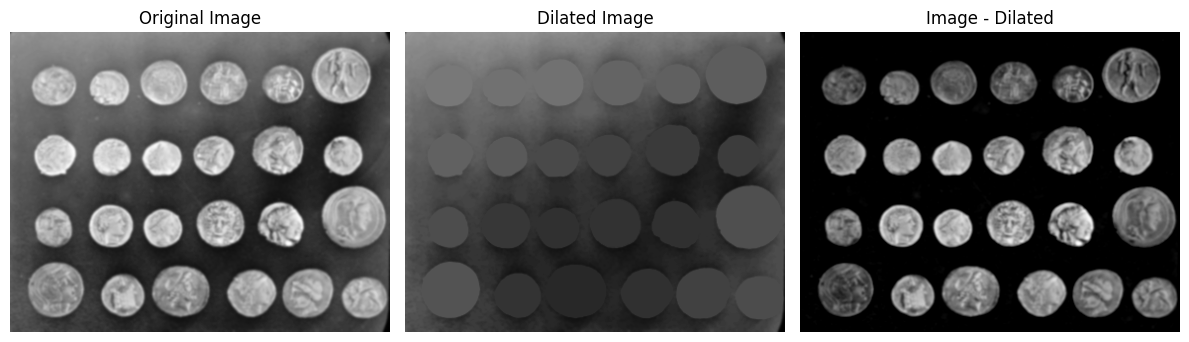

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Load a sample image (coins)
image = img_as_float(data.coins())

# Apply Gaussian filter to smooth the image
image = gaussian_filter(image, 1)

# Create a seed image and a mask for reconstruction
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()  # Set the seed to the minimum value in the image
mask = image

# Perform morphological reconstruction
dilated = reconstruction(seed, mask, method='dilation')

# Prepare the plot
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)

# Display the original image
ax0.imshow(image, cmap='gray')
ax0.set_title('Original Image')
ax0.axis('off')

# Display the dilated image
ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('Dilated Image')
ax1.axis('off')

# Display the difference between the original image and the dilated image
ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('Image - Dilated')
ax2.axis('off')

# Adjust layout and show the plot
fig.tight_layout()
plt.show()


In LAb:


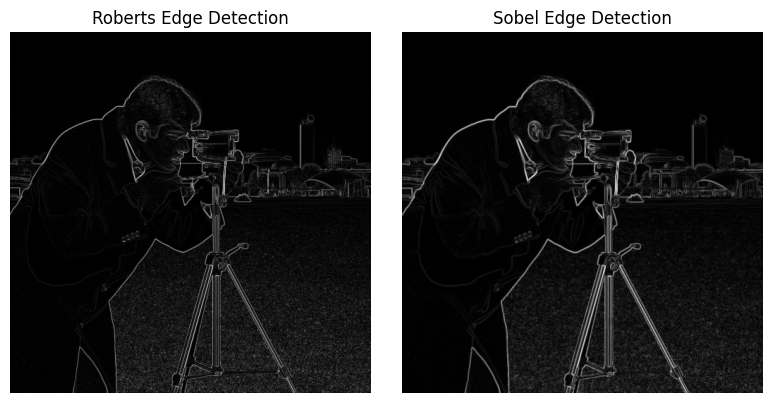

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.data import camera

# Load the sample image
image = camera()

# Apply edge detection filters
edge_roberts = filters.roberts(image)
edge_sobel = filters.sobel(image)

# Create a figure to display the results
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))
axes = axes.ravel()  # Flatten the axes array for easy indexing

# Show Roberts edge detection result
axes[0].imshow(edge_roberts, cmap=plt.cm.gray)
axes[0].set_title('Roberts Edge Detection')

# Show Sobel edge detection result
axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

# Hide axes for both subplots
for ax in axes:
    ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


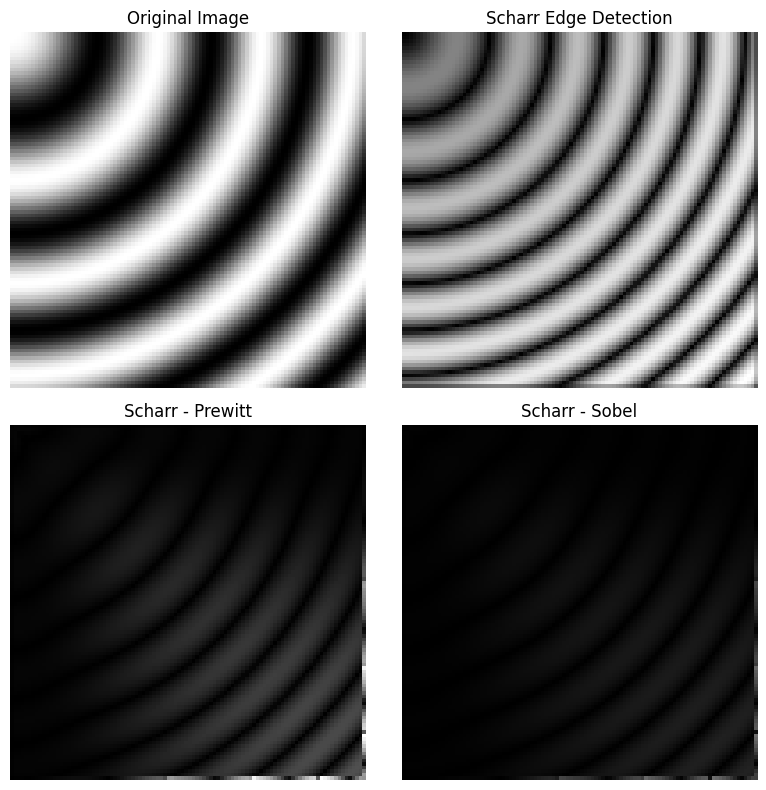

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from skimage.util import compare_images

# Create a grid for the image
x, y = np.ogrid[:100, :100]
# Creating a rotation-invariant image with different spatial frequencies.
image_rot = np.exp(1j * np.hypot(x, y) ** 1.3 / 20.).real

# Apply edge detection filters
edge_sobel = filters.sobel(image_rot)
edge_scharr = filters.scharr(image_rot)
edge_prewitt = filters.prewitt(image_rot)

# Compare the results of Scharr and Prewitt, and Scharr and Sobel
diff_scharr_prewitt = compare_images(edge_scharr, edge_prewitt)
diff_scharr_sobel = compare_images(edge_scharr, edge_sobel)

# Find the maximum difference for proper scaling
max_diff = np.max(np.maximum(diff_scharr_prewitt, diff_scharr_sobel))

# Plotting the results
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
axes = axes.ravel()

# Show original image
axes[0].imshow(image_rot, cmap=plt.cm.gray)
axes[0].set_title('Original Image')

# Show Scharr edge detection result
axes[1].imshow(edge_scharr, cmap=plt.cm.gray)
axes[1].set_title('Scharr Edge Detection')

# Show difference between Scharr and Prewitt
axes[2].imshow(diff_scharr_prewitt, cmap=plt.cm.gray, vmax=max_diff)
axes[2].set_title('Scharr - Prewitt')

# Show difference between Scharr and Sobel
axes[3].imshow(diff_scharr_sobel, cmap=plt.cm.gray, vmax=max_diff)
axes[3].set_title('Scharr - Sobel')

# Hide axis for all plots
for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()


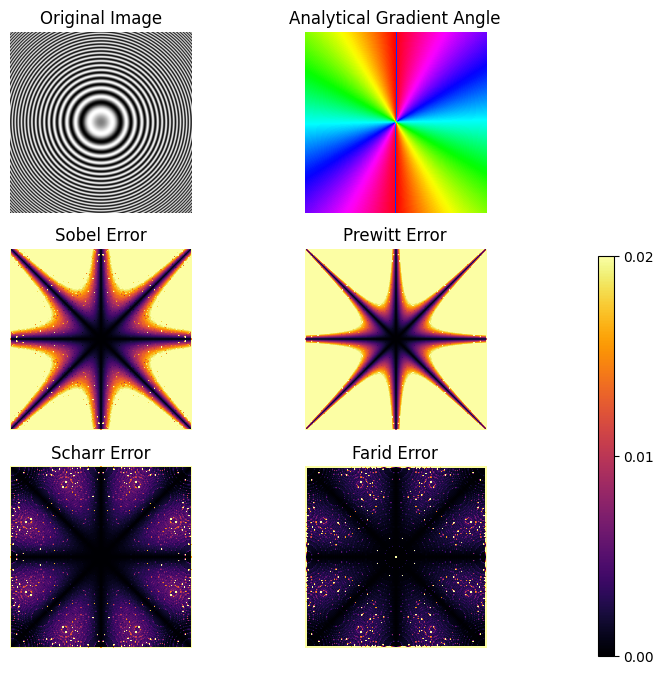

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters

# Generate the rotation-invariant image with different spatial frequencies.
x, y = np.mgrid[-10:10:255j, -10:10:255j]
image_rotinv = np.sin(x ** 2 + y ** 2)

# Calculate the gradient components.
image_x = 2 * x * np.cos(x ** 2 + y ** 2)
image_y = 2 * y * np.cos(x ** 2 + y ** 2)

def angle(dx, dy):
    """Calculate the angles between horizontal and vertical operators."""
    return np.mod(np.arctan2(dy, dx), np.pi)

# Compute the true angle of the gradient.
true_angle = angle(image_x, image_y)

# Calculate angles for different filters.
angle_farid = angle(filters.farid_h(image_rotinv), filters.farid_v(image_rotinv))
angle_sobel = angle(filters.sobel_h(image_rotinv), filters.sobel_v(image_rotinv))
angle_scharr = angle(filters.scharr_h(image_rotinv), filters.scharr_v(image_rotinv))
angle_prewitt = angle(filters.prewitt_h(image_rotinv), filters.prewitt_v(image_rotinv))

def diff_angle(angle_1, angle_2):
    """Calculate the differences between two angles."""
    return np.minimum(np.pi - np.abs(angle_1 - angle_2), np.abs(angle_1 - angle_2))

# Calculate the differences between true angles and filter angles.
diff_farid = diff_angle(true_angle, angle_farid)
diff_sobel = diff_angle(true_angle, angle_sobel)
diff_scharr = diff_angle(true_angle, angle_scharr)
diff_prewitt = diff_angle(true_angle, angle_prewitt)

# Plotting the results.
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(8, 8))
axes = axes.ravel()

axes[0].imshow(image_rotinv, cmap=plt.cm.gray)
axes[0].set_title('Original Image')

axes[1].imshow(true_angle, cmap=plt.cm.hsv)
axes[1].set_title('Analytical Gradient Angle')

axes[2].imshow(diff_sobel, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[2].set_title('Sobel Error')

axes[3].imshow(diff_prewitt, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[3].set_title('Prewitt Error')

axes[4].imshow(diff_scharr, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[4].set_title('Scharr Error')

color_ax = axes[5].imshow(diff_farid, cmap=plt.cm.inferno, vmin=0, vmax=0.02)
axes[5].set_title('Farid Error')

# Add color bar for the last plot.
fig.subplots_adjust(right=0.8)
colorbar_ax = fig.add_axes([0.90, 0.10, 0.02, 0.50])
fig.colorbar(color_ax, cax=colorbar_ax, ticks=[0, 0.01, 0.02])

# Turn off axis for all subplots.
for ax in axes:
    ax.axis('off')

# Show the plot.
plt.show()


Post Lab:

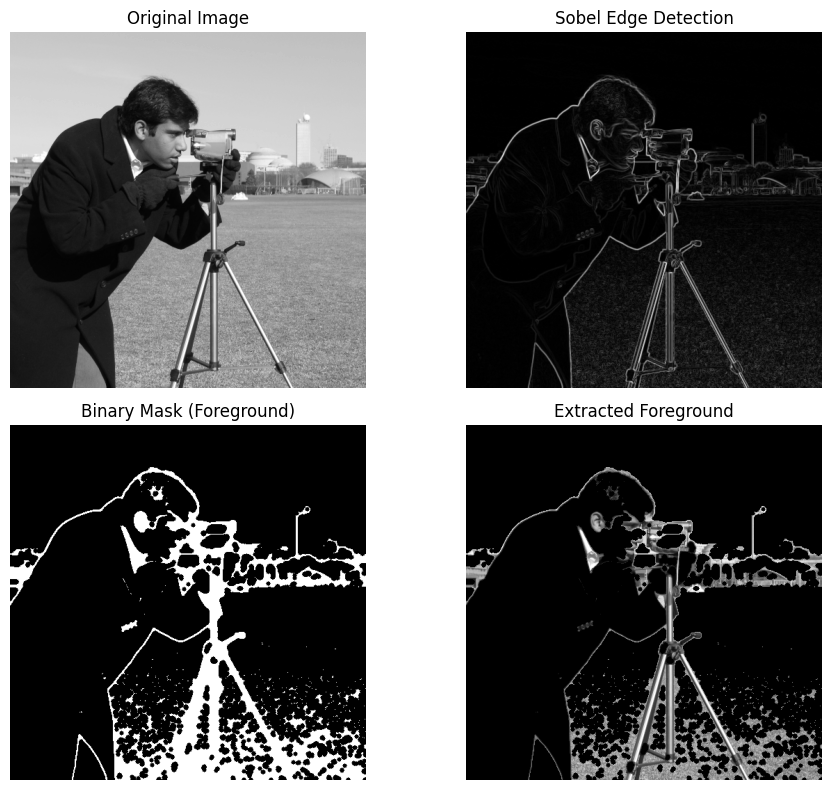

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, morphology
from skimage.data import camera

# Load the sample image
image = camera()

# Step 1: Apply Sobel edge detection
edges = filters.sobel(image)

# Step 2: Thresholding the edge-detected image to create a binary mask
# This assumes that edges correspond to foreground; you may need to adjust the threshold
threshold_value = 0.1  # This value may need to be adjusted based on your image
binary_mask = edges > threshold_value

# Step 3: Clean up the binary mask using morphological operations
# Use closing to fill small holes in the foreground
binary_mask_cleaned = morphology.closing(binary_mask, morphology.disk(3))

# Step 4: Apply the binary mask to extract the foreground
# Create a foreground image
foreground = np.zeros_like(image)
foreground[binary_mask_cleaned] = image[binary_mask_cleaned]

# Step 5: Create a background image by masking out the foreground
background = np.zeros_like(image)
background[~binary_mask_cleaned] = image[~binary_mask_cleaned]

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(edges, cmap='gray')
axes[0, 1].set_title('Sobel Edge Detection')
axes[0, 1].axis('off')

axes[1, 0].imshow(binary_mask_cleaned, cmap='gray')
axes[1, 0].set_title('Binary Mask (Foreground)')
axes[1, 0].axis('off')

axes[1, 1].imshow(foreground, cmap='gray')
axes[1, 1].set_title('Extracted Foreground')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
